Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"



Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = oil_train_data) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 192.1571 

  sigma:  58.4811

     AIC     AICc      BIC 
362.6458 363.5347 366.9478 

Error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE      ACF1
Training set 8.513001 56.56321 42.74775 1.237038 13.11413 0.9677709 0.1888919

Forecasts:
     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2001       456.0338 381.0872 530.9804 341.41282 570.6547
2002       456.0338 350.0486 562.0190 293.94338 618.1241
2003       456.0338 326.2311 585.8364 257.51771 654.5498
2004       456.0338 306.1518 605.9157 226.80909 685.2584
2005       456.0338 288.4615 623.6060 199.75407 712.3134
2006       456.0338 272.4681 639.5994 175.29436 736.7731
2007       456.0338 257.7607 654.3068 152.80127 759.2662
2008       456.0338 244.0713 667.9962 131.86518 780.2023
2009       456

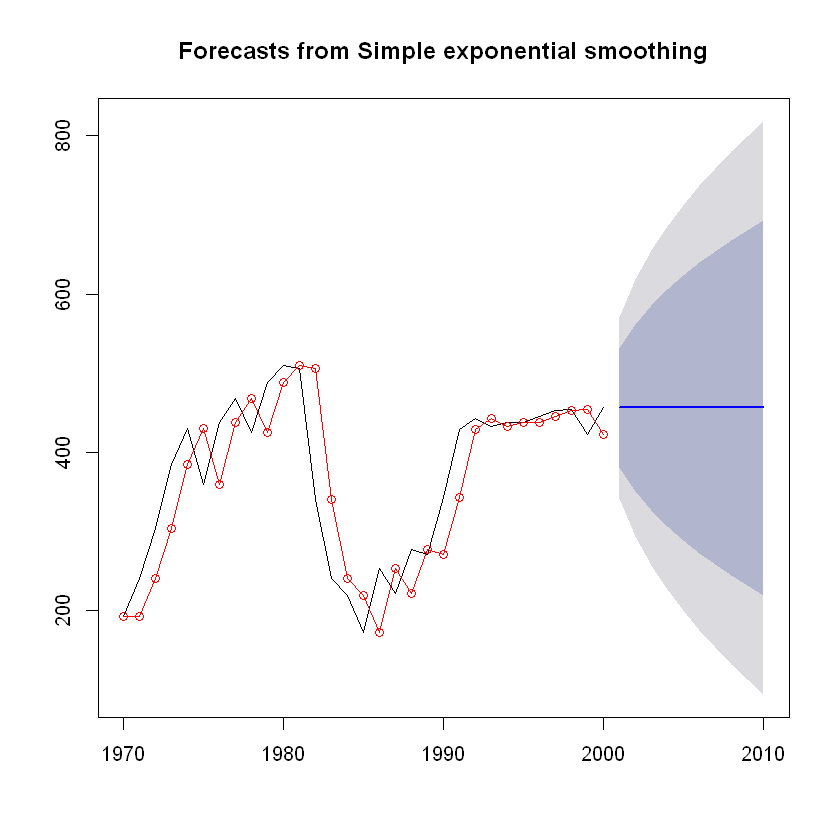

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.514241,56.56321,42.74899,1.237683,13.114778,0.9677990,0.1889093,NA
Test set,25.140020,39.27868,34.43733,4.836676,6.997887,0.7796303,0.4280158,1.24966


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,8.513001,56.56321,42.74775,1.237038,13.114133,0.9677709,0.1888919,NA
Test set,25.140017,39.27867,34.43732,4.836675,6.997886,0.7796302,0.4280158,1.24966


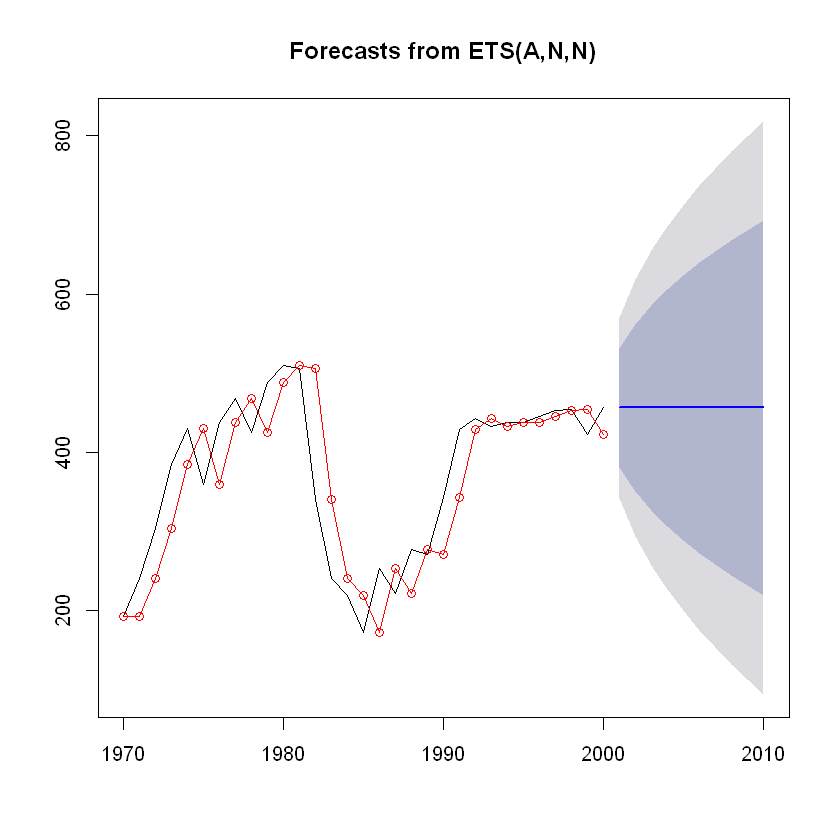

In [1]:
library(forecast)
library(fpp2)


# data for ses() vs ets()
oil_train_data <- window(oil, start=1970, end=2000)
oil_test_data <- window(oil, start=2001, end=2013)

# fit ses
fit_ses_oil <- ses(oil_train_data)
summary(fit_ses_oil)

# forecast ses
fore_ses_oil <- forecast(fit_ses_oil)
plot(fore_ses_oil)
lines(fitted(fit_ses_oil), type="o", col="red")

# fit ets
fit_ets_oil <- ets(oil_train_data)
summary(fit_ets_oil)

# forecast ets
fore_ets_oil <- forecast(fit_ets_oil)
plot(fore_ets_oil)
lines(fitted(fit_ets_oil), type="o", col="red")


# 평가
accuracy(fore_ets_oil,oil_test_data)
accuracy(fore_ses_oil,oil_test_data)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = ausair_train_data) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 9.9867 
    b = 1.1251 

  sigma:  1.736

     AIC     AICc      BIC 
146.3696 148.7696 153.5396 

Error measures:
                       ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.006195664 1.620146 1.118594 -1.591612 5.584888 0.7440821
                  ACF1
Training set 0.0473453

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006       45.78222 43.55743 48.00702 42.37970 49.18475
2007       46.90732 43.76099 50.05365 42.09542 51.71921
2008       48.03241 44.17883 51.88599 42.13887 53.92595
2009       49.15751 44.70759 53.60742 42.35195 55.96306
2010       50.28260 45.30722 55.25798 42.67341 57.89179
2011       51.40769 45.95718 56.85820 43.07186 59.74353
2012       52.53279 46.64528 58.42029 43.52863 61.53695
2013       53.65788 47.36357 59.95219 

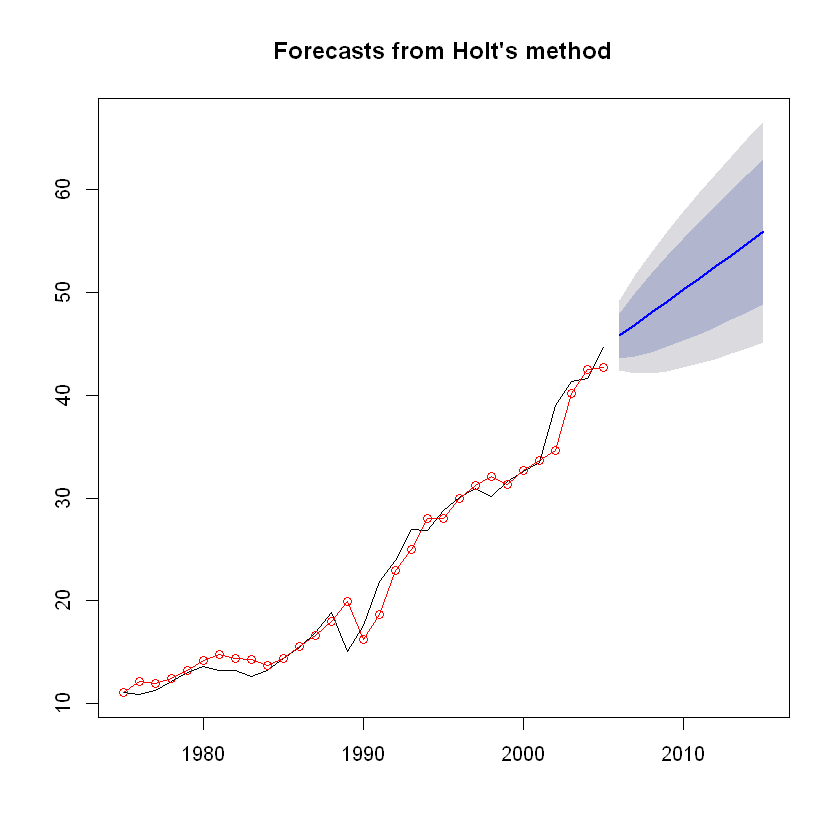

ETS(M,A,N) 

Call:
 ets(y = ausair_train_data) 

  Smoothing parameters:
    alpha = 0.9433 
    beta  = 1e-04 

  Initial states:
    l = 10.097 
    b = 0.7781 

  sigma:  0.0812

     AIC     AICc      BIC 
143.5966 145.9966 150.7666 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3526798 1.664772 1.147784 0.2435318 5.407749 0.7634988
                   ACF1
Training set 0.09926494


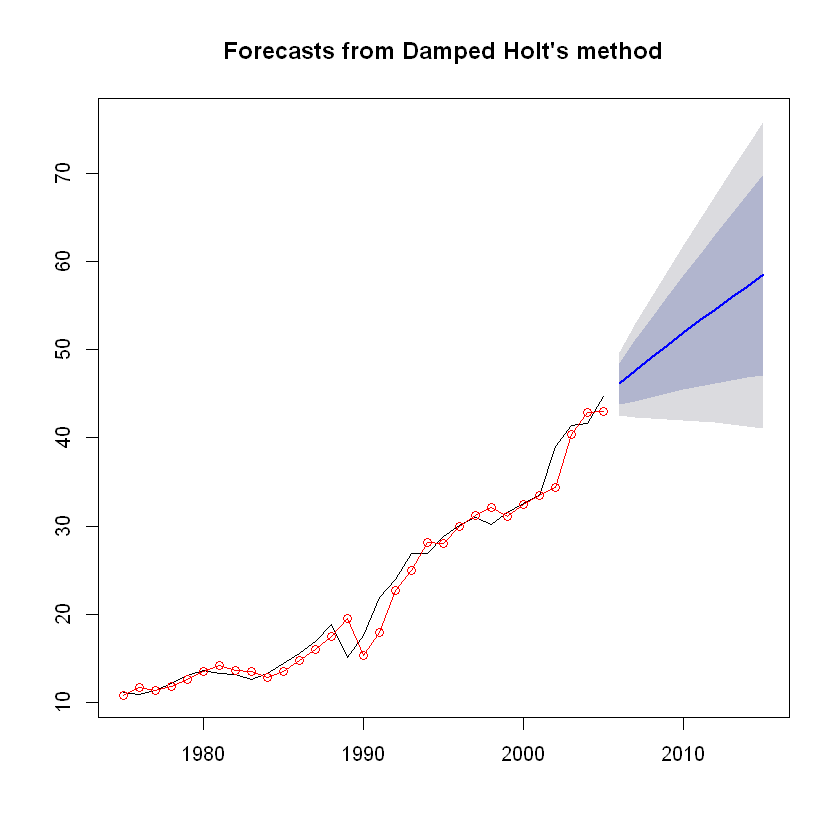

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3526798,1.664772,1.147784,0.2435318,5.407749,0.7634988,0.09926494,NA
Test set,10.5505752,12.401981,10.550575,16.4740364,16.474036,7.0181795,0.71169850,2.63408


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.006195664,1.620146,1.118594,-1.591612,5.584888,0.7440821,0.0473453,NA
Test set,8.520156928,10.199976,8.520157,13.223788,13.223788,5.6675574,0.6966815,2.169414


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.3733363,1.665342,1.163677,1.075389,5.557124,0.7740711,-0.04098742,NA
Test set,6.8778642,8.481858,6.975599,10.574985,10.770349,4.6401267,0.67883776,1.803973


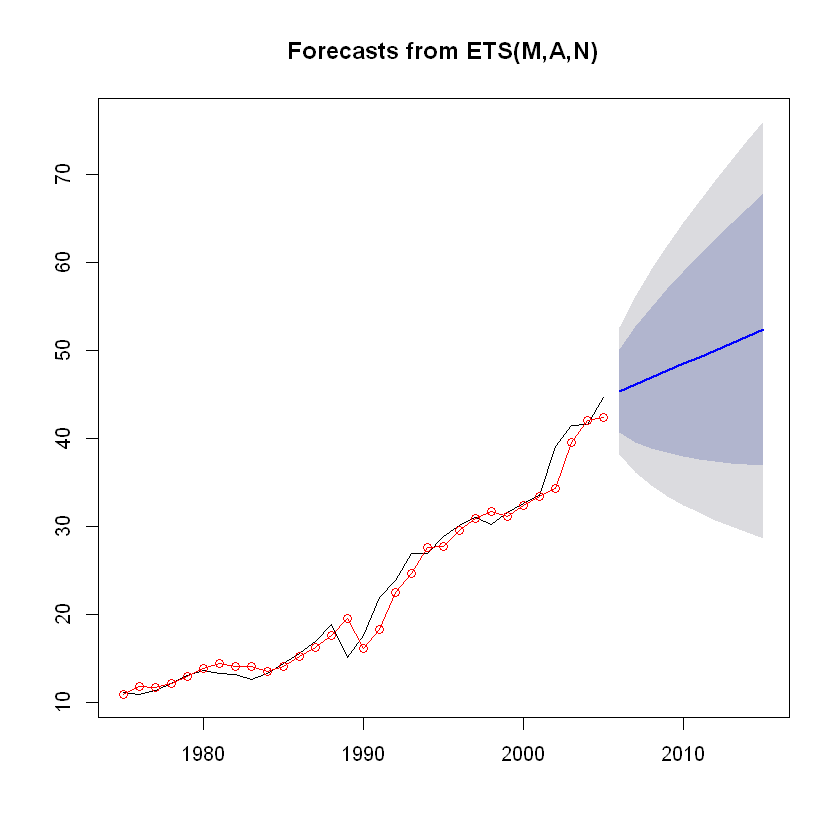

In [2]:
library(forecast)
library(fpp2)


# data for holt() vs ets()
ausair_train_data <- window(ausair, start=1975, end=2005)
ausair_test_data <- window(ausair, start=2006, end=2016)

# fit holt_no damped
fit_holt_ausair_1 <- holt(ausair_train_data)
summary(fit_holt_ausair_1)

# fit holt_damped
fit_holt_ausair_2 <- holt(ausair_train_data, damped=TRUE)
summary(fit_holt_ausair_2)

# forecast holt_no damped
fore_holt_ausair_1 <- forecast(fit_holt_ausair_1)
plot(fore_holt_ausair_1)
lines(fitted(fit_holt_ausair_1), type="o", col="red")

# forecast holt_damped
fore_holt_ausair_2 <- forecast(fit_holt_ausair_2)
plot(fore_holt_ausair_2)
lines(fitted(fit_holt_ausair_2), type="o", col="red")

# fit ets
fit_ets_ausair <- ets(ausair_train_data)
summary(fit_ets_ausair)

# forecast ets
fore_ets_ausair <- forecast(fit_ets_ausair)
plot(fore_ets_ausair)
lines(fitted(fit_ets_ausair), type="o", col="red")


# 평가
accuracy(fore_ets_ausair,ausair_test_data)
accuracy(fore_holt_ausair_1,ausair_test_data)
accuracy(fore_holt_ausair_2,ausair_test_data)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = austourists_train_data, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.2506 
    beta  = 1e-04 
    gamma = 0.4321 

  Initial states:
    l = 27.5704 
    b = 0.4855 
    s = 2.0887 -0.6846 -6.4459 5.0418

  sigma:  2.4281

     AIC     AICc      BIC 
334.1457 338.0587 352.3739 

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.01600417 2.248029 1.694974 -0.7700315 4.824783 0.6226225
                   ACF1
Training set 0.04017263

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2014 Q1       67.71910 64.60730 70.83089 62.96001 72.47818
2014 Q2       43.71151 40.50337 46.91964 38.80509 48.61792
2014 Q3       54.92372 51.62199 58.22545 49.87416 59.97329
2014 Q4       58.69967 55.30685 62.09250 53.51080 63.88855
2015 Q1       69.66141 65.65756 73.66526 63.53805 75.78477
2015 Q2       

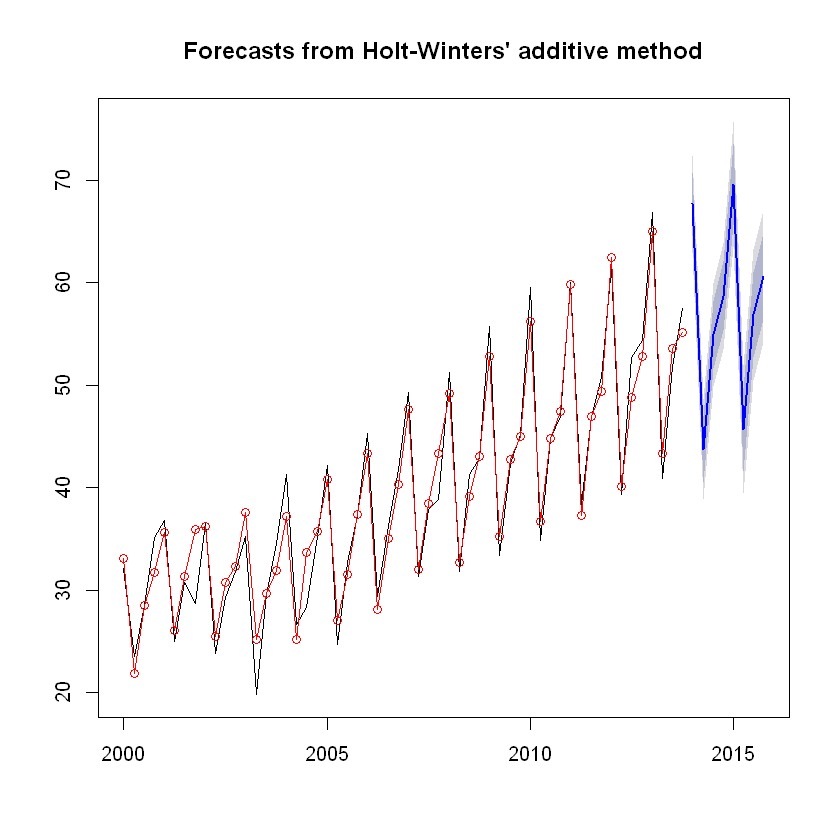

ETS(A,A,A) 

Call:
 ets(y = austourists_train_data) 

  Smoothing parameters:
    alpha = 0.2506 
    beta  = 1e-04 
    gamma = 0.4321 

  Initial states:
    l = 27.5703 
    b = 0.4854 
    s = 2.0887 -0.6848 -6.4457 5.0418

  sigma:  2.4281

     AIC     AICc      BIC 
334.1457 338.0587 352.3739 

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01611745 2.248029 1.694969 -0.769732 4.824727 0.6226207
                   ACF1
Training set 0.04017056


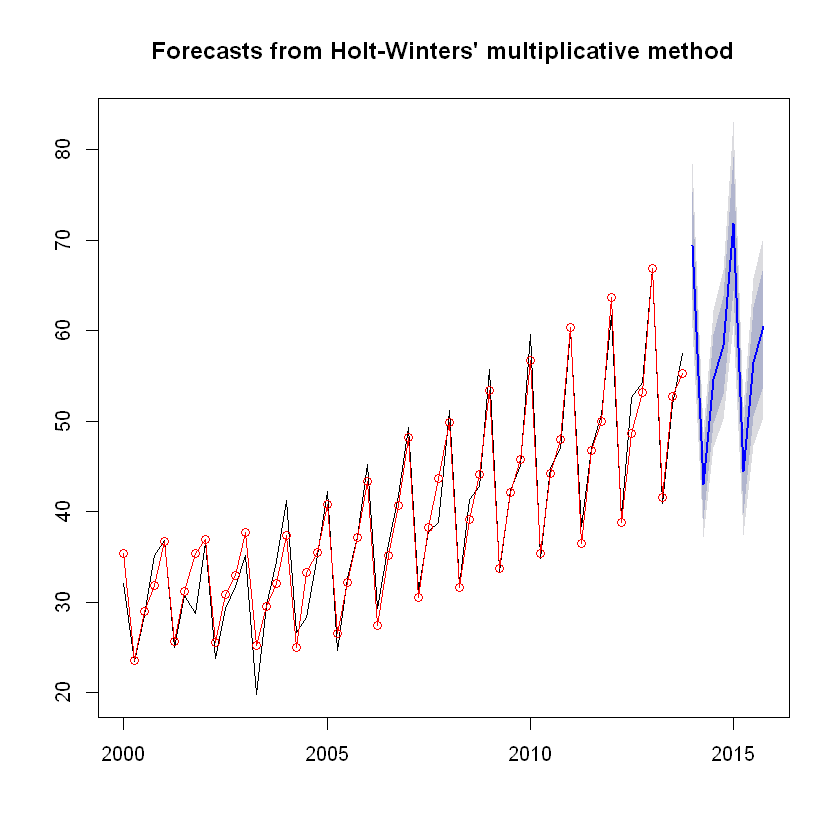

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01611745,2.248029,1.694969,-0.769732,4.824727,0.6226207,0.04017056,NA
Test set,1.64246352,3.003210,2.462588,2.577913,3.975101,0.9045939,0.49579241,0.2129274


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.01600417,2.248029,1.694974,-0.7700315,4.824783,0.6226225,0.04017263,NA
Test set,1.64223167,3.003009,2.462454,2.5775210,3.974891,0.9045444,0.49578563,0.2129111


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.04120561,2.145898,1.551358,-0.8266727,4.440420,0.5698674,0.1093837,NA
Test set,1.54112579,3.251422,2.583929,2.6482491,4.246379,0.9491665,0.4227807,0.2140933


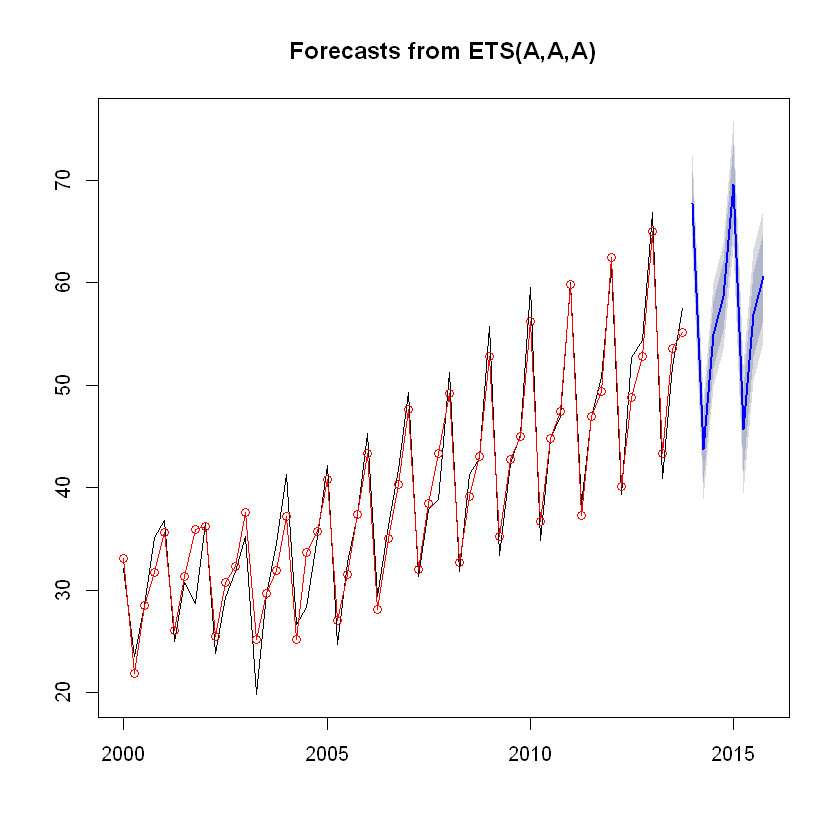

In [3]:
library(forecast)
library(fpp2)

# data for hw() vs ets()
austourists_train_data <- window(austourists, start=c(2000,1), end=c(2013,4))
austourists_test_data <- window(austourists, start=c(2014,1), end=c(2015,4))

# fit hw_additive
fit_hw_austourist_1 <- hw(austourists_train_data, seasonal="additive")
summary(fit_hw_austourist_1)

# fit hw_multiplicative
fit_hw_austourist_2 <- hw(austourists_train_data, seasonal="multiplicative")
summary(fit_hw_austourist_2)

# forecast hw_additive
fore_hw_austourist_1 <- forecast(fit_hw_austourist_1)
plot(fore_hw_austourist_1)
lines(fitted(fit_hw_austourist_1), type="o", col="red")

# forecast hw_additive
fore_hw_austourist_2 <- forecast(fit_hw_austourist_2)
plot(fore_hw_austourist_2)
lines(fitted(fit_hw_austourist_2), type="o", col="red")

# fit ets
fit_ets_austourist <- ets(austourists_train_data)
summary(fit_ets_austourist)

# forecast ets
fore_ets_austourist <- forecast(fit_ets_austourist)
plot(fore_ets_austourist)
lines(fitted(fit_ets_austourist), type="o", col="red")


# 평가
accuracy(fore_ets_austourist,austourists_test_data)
accuracy(fore_hw_austourist_1,austourists_test_data)
accuracy(fore_hw_austourist_2,austourists_test_data)
